In [5]:
import csv
import math
import operator
import numpy as np
import collections
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

#Open csv File
file_kalman = open('pasos_result.csv','r')
file_ground = open('pasos_ground2.csv','r')

#Read csv File
pasos_res = list(csv.reader(file_kalman, delimiter=','))
pasos_gt = list(csv.reader(file_ground, delimiter=','))

# Vector pie izquierdo y derecho GTruth
rows_gt = len(pasos_gt)
cols_gt = 10

right_fgt = []
left_fgt  = []

for i in range(1, rows_gt):
    if int(pasos_gt[i][2]) == 1:
        right_fgt.append(pasos_gt[i][0])
    else:
        left_fgt.append(pasos_gt[i][0])

        
# Vector pie izquierdo y derecho Result
rows_res = len(pasos_res)
cols_res = 10

right_fres = []
left_fres  = []

for i in range(1, rows_res):
    if (pasos_res[i][5]) == 'Rigth':
        right_fres.append(pasos_res[i][0])
    else:
        left_fres.append(pasos_res[i][0])
        
print rows_res

191


In [6]:
ini = 1936
fin = ini + rows_res - 1 

right_sgt = np.zeros((fin-ini, 1), dtype=bool)
left_sgt  = np.zeros((fin-ini, 1), dtype=bool)

right_sres = np.zeros((fin-ini, 1), dtype=bool)
left_sres  = np.zeros((fin-ini, 1), dtype=bool)

# Señal de Groudtruth
for i in range(ini, fin):
    a = '0' + str(i) + '.jpg'
    if a in right_fgt:
        right_sgt[i-ini] = True
    else:
        right_sgt[i-ini] = False

    if a in left_fgt:
        left_sgt[i-ini] = True
    else:
        left_sgt[i-ini] = False

# Señal Resultado 
for i in range(ini, fin):
    a = '0' + str(i) + '.jpg'
    if a in right_fres:
        right_sres[i-ini] = True
    else:
        right_sres[i-ini] = False

    if a in left_fres:
        left_sres[i-ini] = True
    else:
        left_sres[i-ini] = False   

        
print np.shape(right_sgt)[0] + np.shape(left_sgt)[0]

380


In [7]:
TPleft = left_sgt & left_sres
TPright = right_sgt & right_sres
TP = float(np.sum(TPright) + np.sum(TPleft))

print 'TP: ', TP

FNleft = left_sgt & (~left_sres)
FNright = right_sgt & (~right_sres)
FN = float(np.sum(FNright) + np.sum(FNleft))

print 'FN: ', FN

FPleft = (~left_sgt) & (left_sres)
FPright = (~right_sgt) & (right_sres)
FP = float(np.sum(FPright) + np.sum(FPleft))

print 'FP: ', FP

TNleft  = (~left_sgt) & (~left_sres)
TNright = (~right_sgt) & (~right_sres)
TN = float(np.sum(TNright) + np.sum(TNleft))

print 'TN: ', TN

Precition   = TP/(TP + FP)
Sensitivity = TP/(TP + FN)
Specificity = TN/(FP + TN)

print 'Precition: ', Precition
print 'Sensitivity: ', Sensitivity
print 'Specificity: ', Specificity

TP:  117.0
FN:  30.0
FP:  35.0
TN:  198.0
Precition:  0.769736842105
Sensitivity:  0.795918367347
Specificity:  0.849785407725


<IPython.core.display.Javascript object>


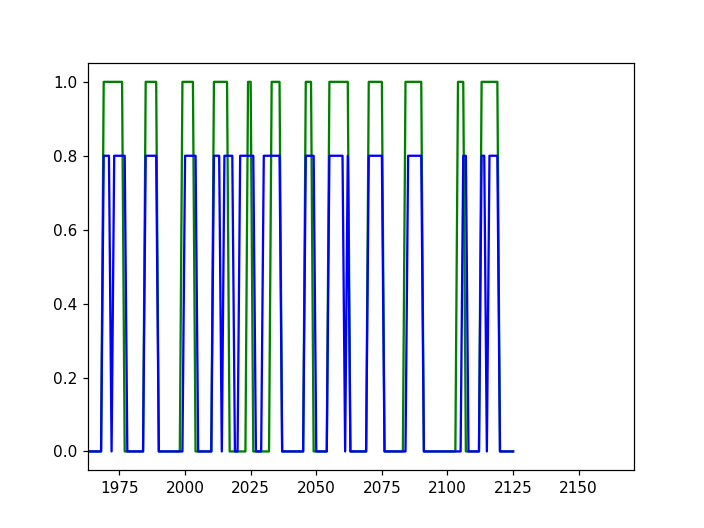

In [8]:
plt.figure()
plt.plot(np.arange(ini,fin),left_sgt, 'g')
plt.plot(np.arange(ini,fin),left_sres*0.8, 'b')
plt.show()

<IPython.core.display.Javascript object>


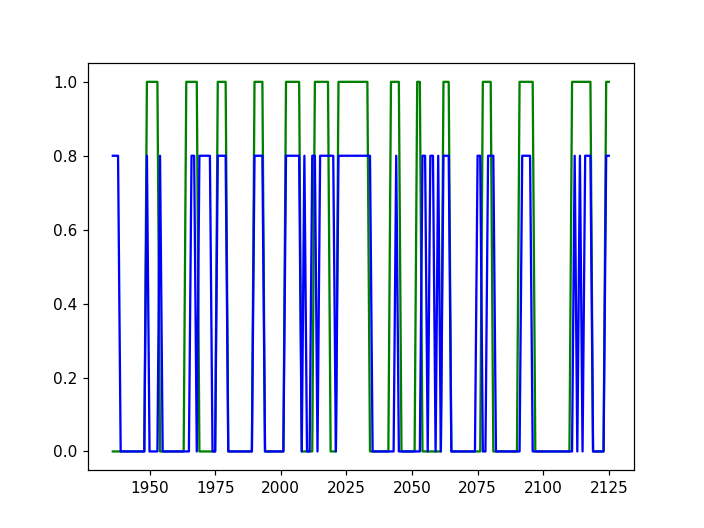

In [9]:
plt.figure()
plt.plot(np.arange(ini,fin),right_sgt, 'g')
plt.plot(np.arange(ini,fin),right_sres*0.8, 'b')
plt.show()

In [4]:














foot_kalman   = np.zeros((rows_kalman, 2))
foot_measured = np.zeros((rows_kalman, 2))
error  = np.zeros((rows_kalman, 1))
errorx  = np.zeros((rows_kalman, 1))
errory  = np.zeros((rows_kalman, 1))
frames  = np.zeros((rows_kalman, 1))

for i in range(1,rows_kalman):
    foot_kalman[i][0]   = int(kalman_list[i][1])
    foot_kalman[i][1]   = int(kalman_list[i][2])
    foot_measured[i][0] = int(kalman_list[i][3])
    foot_measured[i][1] = int(kalman_list[i][4])
    dx = foot_kalman[i][0] - foot_measured[i][0]
    dy = foot_kalman[i][1] - foot_measured[i][1]
    
    error[i] = np.sqrt(dx*dx + dy*dy)
    errory[i] = abs(dy*dy)
    errorx[i] = abs(dx*dx)
    
    str_frame = kalman_list[i][0]
    frames[i] = int(str_frame.translate(None, '.jpg'))

<IPython.core.display.Javascript object>


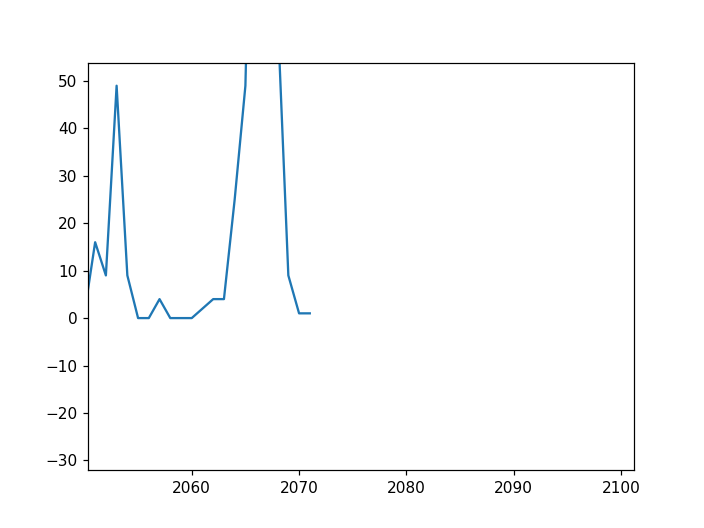

In [5]:
errorp = errorx 

fnl_error = np.power(errorp[2:], 1)
fnl_error_ac    = fnl_error - np.average(fnl_error) 
error_ac = errorp[2:] - np.average(errorp[2:])
fig1=plt.figure(1)
ax = fig1.add_subplot(1,1,1)
ax.figure.canvas.draw()
ax.plot(frames[2:], fnl_error)
# ax.plot(frames[2:], np.ones((rows_kalman, 1)))
plt.ion()     # turns on interactive mode
plt.show() 

# print "doing something else now"
# raw_input('Press Enter to continue...')
    